In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from io import StringIO


# Carregar o arquivo CSV
uploaded = files.upload()

# Identificar o nome do arquivo
filename = list(uploaded.keys())[0]
file_content = uploaded[filename]

# Tentar ler com diferentes delimitadores
try:
    # Tentativa 1: Delimitador padrão (vírgula)
    data = pd.read_csv(StringIO(file_content.decode('utf-8')), delimiter=',')
    print("Arquivo lido com vírgula como delimitador:")
    print(data.head())
except:
    print("Erro ao tentar ler com vírgula. Tentando com ponto e vírgula...")

    # Tentativa 2: Delimitador ponto e vírgula
    try:
        data = pd.read_csv(StringIO(file_content.decode('utf-8')), delimiter=';')
        print("Arquivo lido com ponto e vírgula como delimitador:")
        print(data.head())
    except:
        print("Erro ao tentar ler com ponto e vírgula. Tentando com tabulação...")

        # Tentativa 3: Delimitador tabulação
        try:
            data = pd.read_csv(StringIO(file_content.decode('utf-8')), delimiter='\t')
            print("Arquivo lido com tabulação como delimitador:")
            print(data.head())
        except:
            print("Não foi possível ler o arquivo com os delimitadores testados.")

# Se o arquivo foi lido corretamente, renomear as colunas
if 'data' in locals():
    # Exibir informações sobre o DataFrame
    print(data.info())

    # Renomear as colunas, caso necessário
    colunas_corrigidas = ['Produto', 'Quantidade', 'Preço Unitário', 'Total', 'Linha de Produto', 'Tipo de Cliente', 'Gênero', 'Cidade']
    if len(data.columns) == len(colunas_corrigidas):
        data.columns = colunas_corrigidas
        print("Colunas renomeadas com sucesso!")

    # Verificar as primeiras linhas dos dados
    print(data.head(20))

Saving dataset_vendas_supermercado.csv to dataset_vendas_supermercado.csv
Arquivo lido com vírgula como delimitador:
        Produto  Quantidade  Preço Unitário  Total Linha de Produto  \
0  Carne Bovina         1.0            25.0   25.0           Carnes   
1         Sabão         1.0             8.0    8.0          Limpeza   
2        Frango         1.0            12.0   12.0           Carnes   
3    Detergente         1.0             3.5    3.5          Limpeza   
4         Leite         8.0             4.5   36.0       Laticínios   

   Tipo de Cliente     Gênero          Cidade  
0  Pessoa Jurídica   Feminino  Rio de Janeiro  
1  Pessoa Jurídica   Feminino  Rio de Janeiro  
2  Pessoa Jurídica   Feminino  Rio de Janeiro  
3  Pessoa Jurídica   Feminino  Rio de Janeiro  
4    Pessoa Física  Masculino    Porto Alegre  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33162 entries, 0 to 33161
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------  

<ipython-input-7-fc5d0ea2b3e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Linha de Produto', y='Total', data=vendas_por_categoria, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

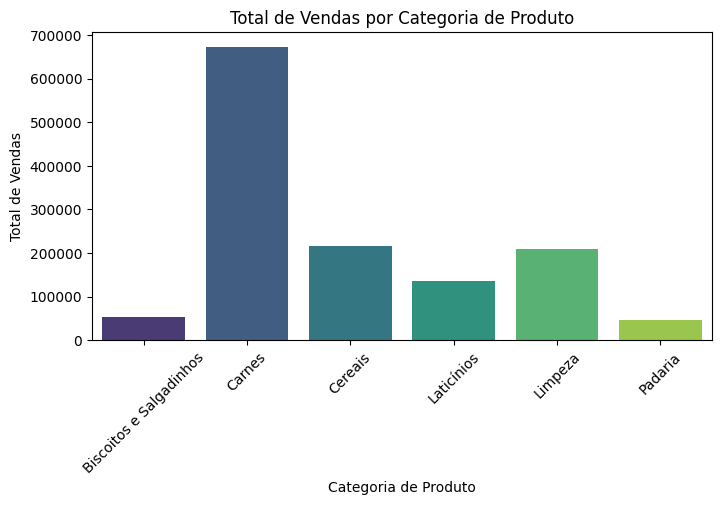

In [7]:
# Agrupar e somar vendas por 'Linha de Produto'
vendas_por_categoria = data.groupby('Linha de Produto')['Total'].sum().reset_index()

# Plotar gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x='Linha de Produto', y='Total', data=vendas_por_categoria, palette='viridis')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

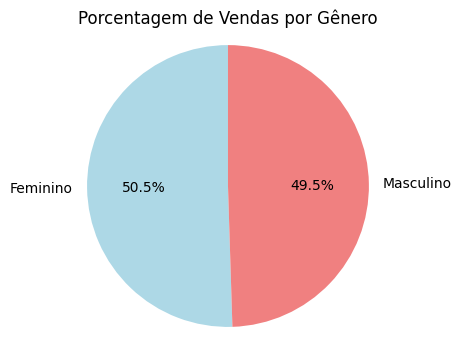

In [8]:
# Agrupar por gênero e somar vendas
vendas_por_genero = data.groupby('Gênero')['Total'].sum()

# Plotar gráfico de pizza
plt.figure(figsize=(4,4))
plt.pie(vendas_por_genero, labels=vendas_por_genero.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Porcentagem de Vendas por Gênero')
plt.axis('equal')  # Para manter o formato circular
plt.show()


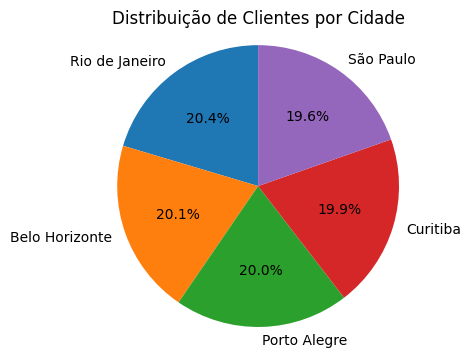

In [12]:
# Contar o número de clientes por cidade
clientes_por_cidade = data['Cidade'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(4,4))
plt.pie(clientes_por_cidade, labels=clientes_por_cidade.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Clientes por Cidade')
plt.axis('equal')  # Para manter o formato circular
plt.show()


<ipython-input-5-ab348a1cc618>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cidade', y='Total', data=vendas_por_cidade, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

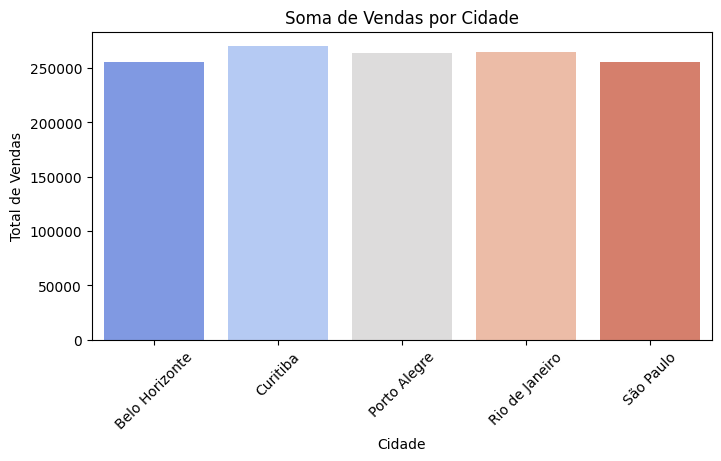

In [5]:
# Agrupar e somar vendas por cidade
vendas_por_cidade = data.groupby('Cidade')['Total'].sum().reset_index()

# Plotar gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x='Cidade', y='Total', data=vendas_por_cidade, palette='coolwarm')
plt.title('Soma de Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()


<ipython-input-10-a824c18edcc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Linha de Produto', y='Total', data=data, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gro

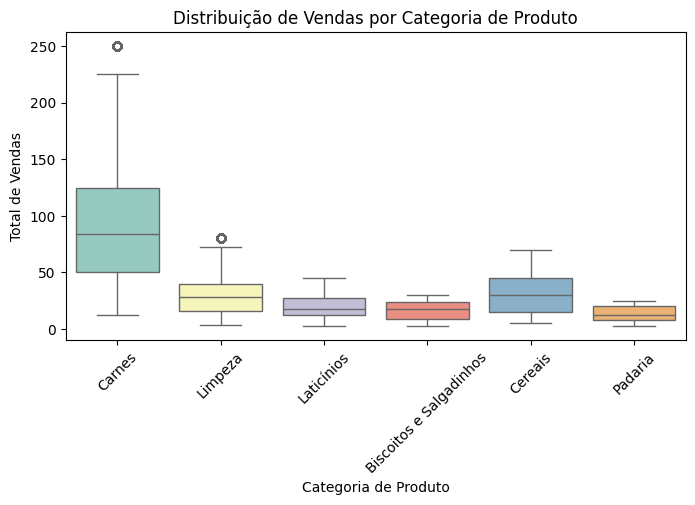

In [10]:
# Plotar a distribuição de vendas por categoria de produto
plt.figure(figsize=(8,4))
sns.boxplot(x='Linha de Produto', y='Total', data=data, palette='Set3')
plt.title('Distribuição de Vendas por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()
